### Titanic data

- 파일 업로드

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df = sns.load_dataset('titanic')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


### 1. 데이터 전처리

- feature selection

In [63]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked', 'deck']]
df.head(3)

,survived,pclass,sex,age,sibsp,parch,embarked,deck
0,0,3,male,22.0,1,0,S,NaN
1,1,1,female,38.0,1,0,C,C
2,1,3,female,26.0,0,0,S,NaN


- 결측치 처리

In [64]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
embarked      2
deck        688
dtype: int64

In [65]:
# age는 age의 평균으로 대체
df.age.fillna(df.age.mean(), inplace=True)

In [66]:
# embarked 컬럼은 최빈값으로 대체
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [67]:
df.embarked.fillna('S', inplace=True)

In [68]:
# deck 컬럼은 삭제
df.drop(columns=['deck'], inplace=True)

In [69]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S


- 카테고리 값을 숫자로 변환하기

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.sex = le.fit_transform(df.sex)               # 0: female, 1: male
df.embarked = le.fit_transform(df.embarked)     # 0: C, 1: Q, 2: S
df.head(3)

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2


In [71]:
df.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    0
dtype: int64

- age 스케일링

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.age = scaler.fit_transform(df.age.values.reshape(-1,1))
df.head(3)

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,1,0.271174,1,0,2
1,1,1,0,0.472229,1,0,0
2,1,3,0,0.321438,0,0,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


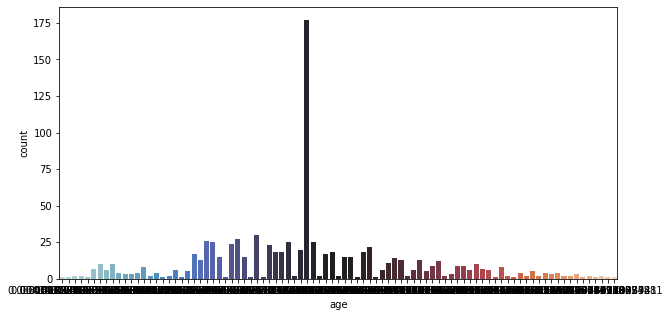

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(df.age, palette='icefire')

### 2. Train/Test dataset 분리

In [165]:
X = df.iloc[:,1:].values
y = df.survived.values

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   X, y, stratify=y, test_size=0.2, random_state=2022
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

### 3. 모델 정의/설정

In [168]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- model1: 은닉층 2개

In [428]:
del model1

In [398]:
model1 = Sequential([ 
    Dense(80, input_dim=6, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')
])
model1.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_341 (Dense)           (None, 80)                560       
                                                                 
 dense_342 (Dense)           (None, 20)                1620      
                                                                 
 dense_343 (Dense)           (None, 1)                 21        
                                                                 
Total params: 2,201
Trainable params: 2,201
Non-trainable params: 0
_________________________________________________________________


In [399]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [400]:
history = model1.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=200, verbose=0)

In [401]:
model1.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8436


[0.4038321077823639, 0.8435754179954529]

- model2: 은닉층 4개

In [429]:
del model2

NameError: ignored

In [430]:
model2 = Sequential([ 
    Dense(64, input_dim=6, activation='relu'),
    Dense(40, input_dim=3, activation='relu'),
    Dense(20, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.summary()

Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_393 (Dense)           (None, 64)                448       
                                                                 
 dense_394 (Dense)           (None, 40)                2600      
                                                                 
 dense_395 (Dense)           (None, 20)                820       
                                                                 
 dense_396 (Dense)           (None, 12)                252       
                                                                 
 dense_397 (Dense)           (None, 1)                 13        
                                                                 
Total params: 4,133
Trainable params: 4,133
Non-trainable params: 0
_________________________________________________________________


In [431]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, validation_split=0.2, verbose=0,
                    epochs=200, batch_size=200)
model2.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.8212


[0.4435173273086548, 0.8212290406227112]

In [432]:
del model2

- 은닉층 6개

In [433]:
model3 = Sequential([ 
    Dense(80, input_dim=6, activation='relu'),
    Dense(64, activation='relu'),
    Dense(40, activation='relu'),    
    Dense(20, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model3.summary()

Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_398 (Dense)           (None, 80)                560       
                                                                 
 dense_399 (Dense)           (None, 64)                5184      
                                                                 
 dense_400 (Dense)           (None, 40)                2600      
                                                                 
 dense_401 (Dense)           (None, 20)                820       
                                                                 
 dense_402 (Dense)           (None, 12)                252       
                                                                 
 dense_403 (Dense)           (None, 8)                 104       
                                                                 
 dense_404 (Dense)           (None, 1)               

In [434]:
model3.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=200, verbose=0)
model3.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.8324


[0.46474042534828186, 0.832402229309082]

- 은닉층이 6개인 model3를 사용, batch_size를 조절 (batch_size 감소)

In [453]:
model3 = Sequential([ 
    Dense(80, input_dim=6, activation='relu'),
    Dense(64, activation='relu'),
    Dense(40, activation='relu'),    
    Dense(20, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model3.summary()

Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_439 (Dense)           (None, 80)                560       
                                                                 
 dense_440 (Dense)           (None, 64)                5184      
                                                                 
 dense_441 (Dense)           (None, 40)                2600      
                                                                 
 dense_442 (Dense)           (None, 20)                820       
                                                                 
 dense_443 (Dense)           (None, 12)                252       
                                                                 
 dense_444 (Dense)           (None, 8)                 104       
                                                                 
 dense_445 (Dense)           (None, 1)               

In [443]:
# batch_size=50
model3.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=50, verbose=0)
model3.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.8324


[0.594028115272522, 0.832402229309082]

- 은닉층이 6개인 model3를 사용, batch_size를 조절(batch_size 증가)

In [445]:
# batch_size = 300
model3.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=300, verbose=0)
model3.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.8268


[0.45511478185653687, 0.826815664768219]

In [446]:
del model3

In [451]:
# batch_size = 400
model3.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=400, verbose=0)
model3.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.8156


[0.42886343598365784, 0.8156424760818481]

- 은닉층이 6개인 model3를 사용, epoch 조절(횟수 증가)

In [452]:
del model3

In [454]:
# epochs=400
model3.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=400, batch_size=200, verbose=0)
model3.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.8380


[0.5561097264289856, 0.8379888534545898]

In [377]:
# epochs=300
model3.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=300, batch_size=200, verbose=0)
model3.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5188 - accuracy: 0.8101


[0.5187670588493347, 0.8100558519363403]

- 시각화

In [390]:
y_acc = history3.history['accuracy']
y_vloss = history3.history['val_loss']
xs = np.arange(1,len(y_acc)+1)

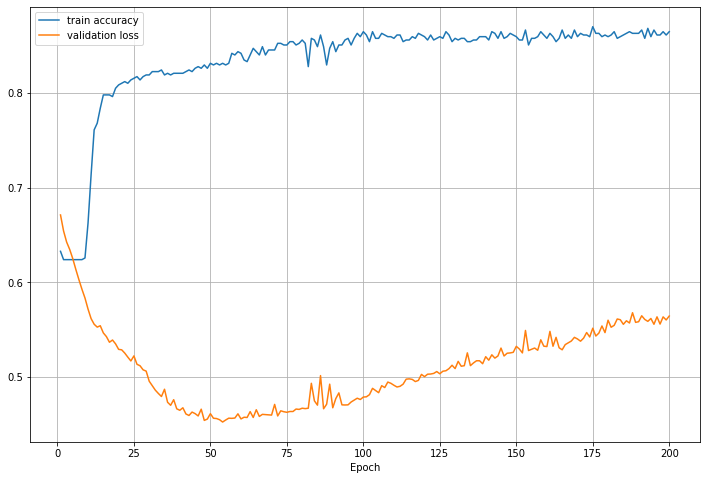

In [391]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')     
plt.plot(xs, y_vloss, ms=5, label='validation loss') 
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()